# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-12-19*

In [1]:
import numpy as np
import os

import sys
sys.path.append('../../../src/')
from namelist import *
from mask import average_data
from spatial import map_noneobs, diff_noneobs

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'QV'
years = np.array([2022,2021,2019]) # 此处年份倒置是为了方便后续创建dataarray时取用时间维度

summer_files = [os.path.join(processed_dir, f"Jul_{year}/Jul_{year}_mcip.nc") for year in years]
autumn_files = [os.path.join(processed_dir, f"Sep_{year}/Sep_{year}_mcip.nc") for year in years]

avg_summer    = average_data(summer_files, var)
avg_autumn    = average_data(autumn_files, var)
avg_summer_uw = average_data(summer_files, 'uwind')
avg_autumn_uw = average_data(autumn_files, 'uwind')
avg_summer_vw = average_data(summer_files, 'vwind')
avg_autumn_vw = average_data(autumn_files, 'vwind')

In [3]:
avg_summer = avg_summer*1000
avg_autumn = avg_autumn*1000

In [4]:
mean_summer = avg_summer.mean(dim='time')
mean_autumn = avg_autumn.mean(dim='time')

uwind_summer = avg_summer_uw.mean(dim='time')
uwind_autumn = avg_autumn_uw.mean(dim='time')
vwind_summer = avg_summer_vw.mean(dim='time')
vwind_autumn = avg_autumn_vw.mean(dim='time')

In [5]:
cmin=10
cmax=25
cmstep=0.1
cbstep=5

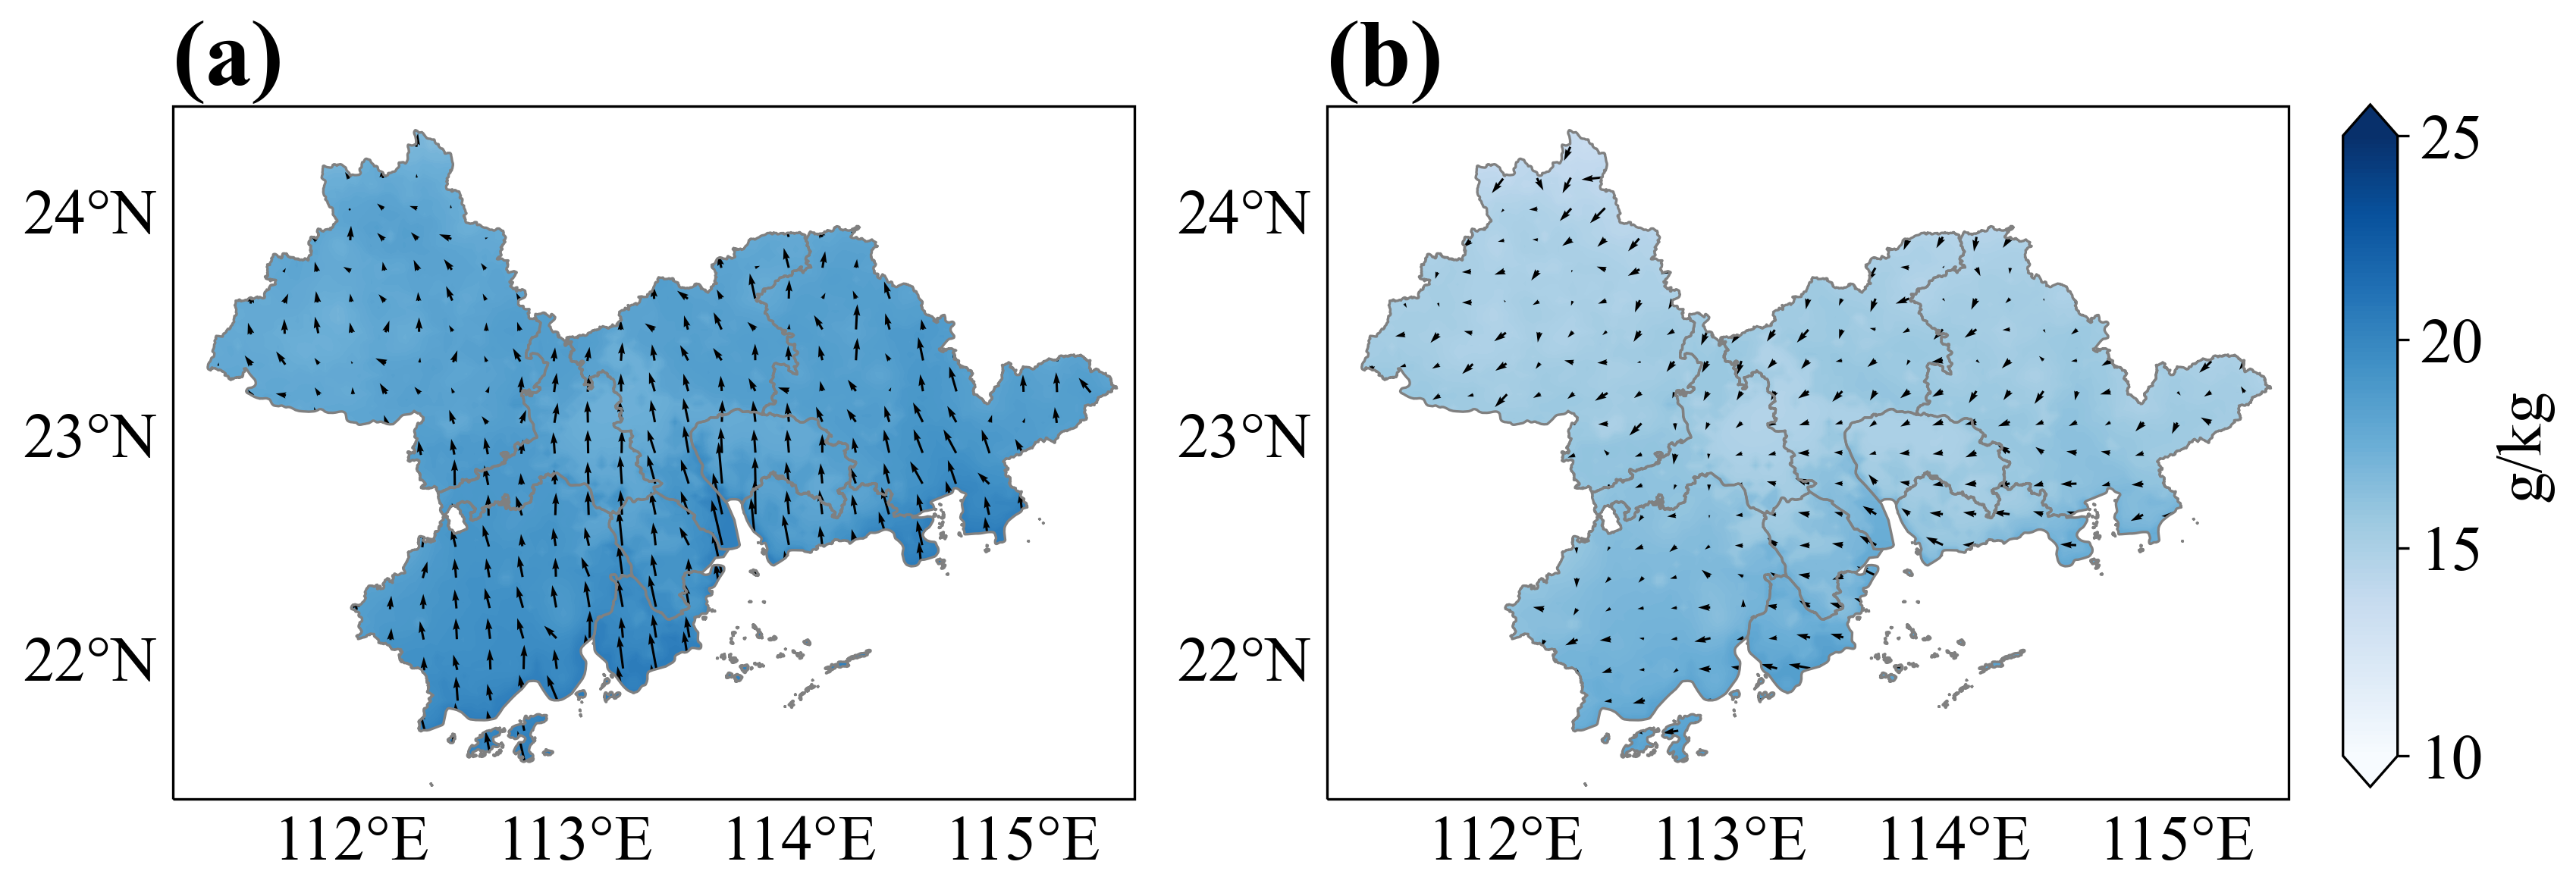

In [6]:
map_noneobs(avg_summer, cmin, cmax, cmstep, cbstep,
             mean_summer, mean_autumn,uwind_summer, vwind_summer,uwind_autumn, vwind_autumn,
             ngrid=5, scale=100, headwidth=3,
             mapcolor='Blues',colorbar_label='g/kg')

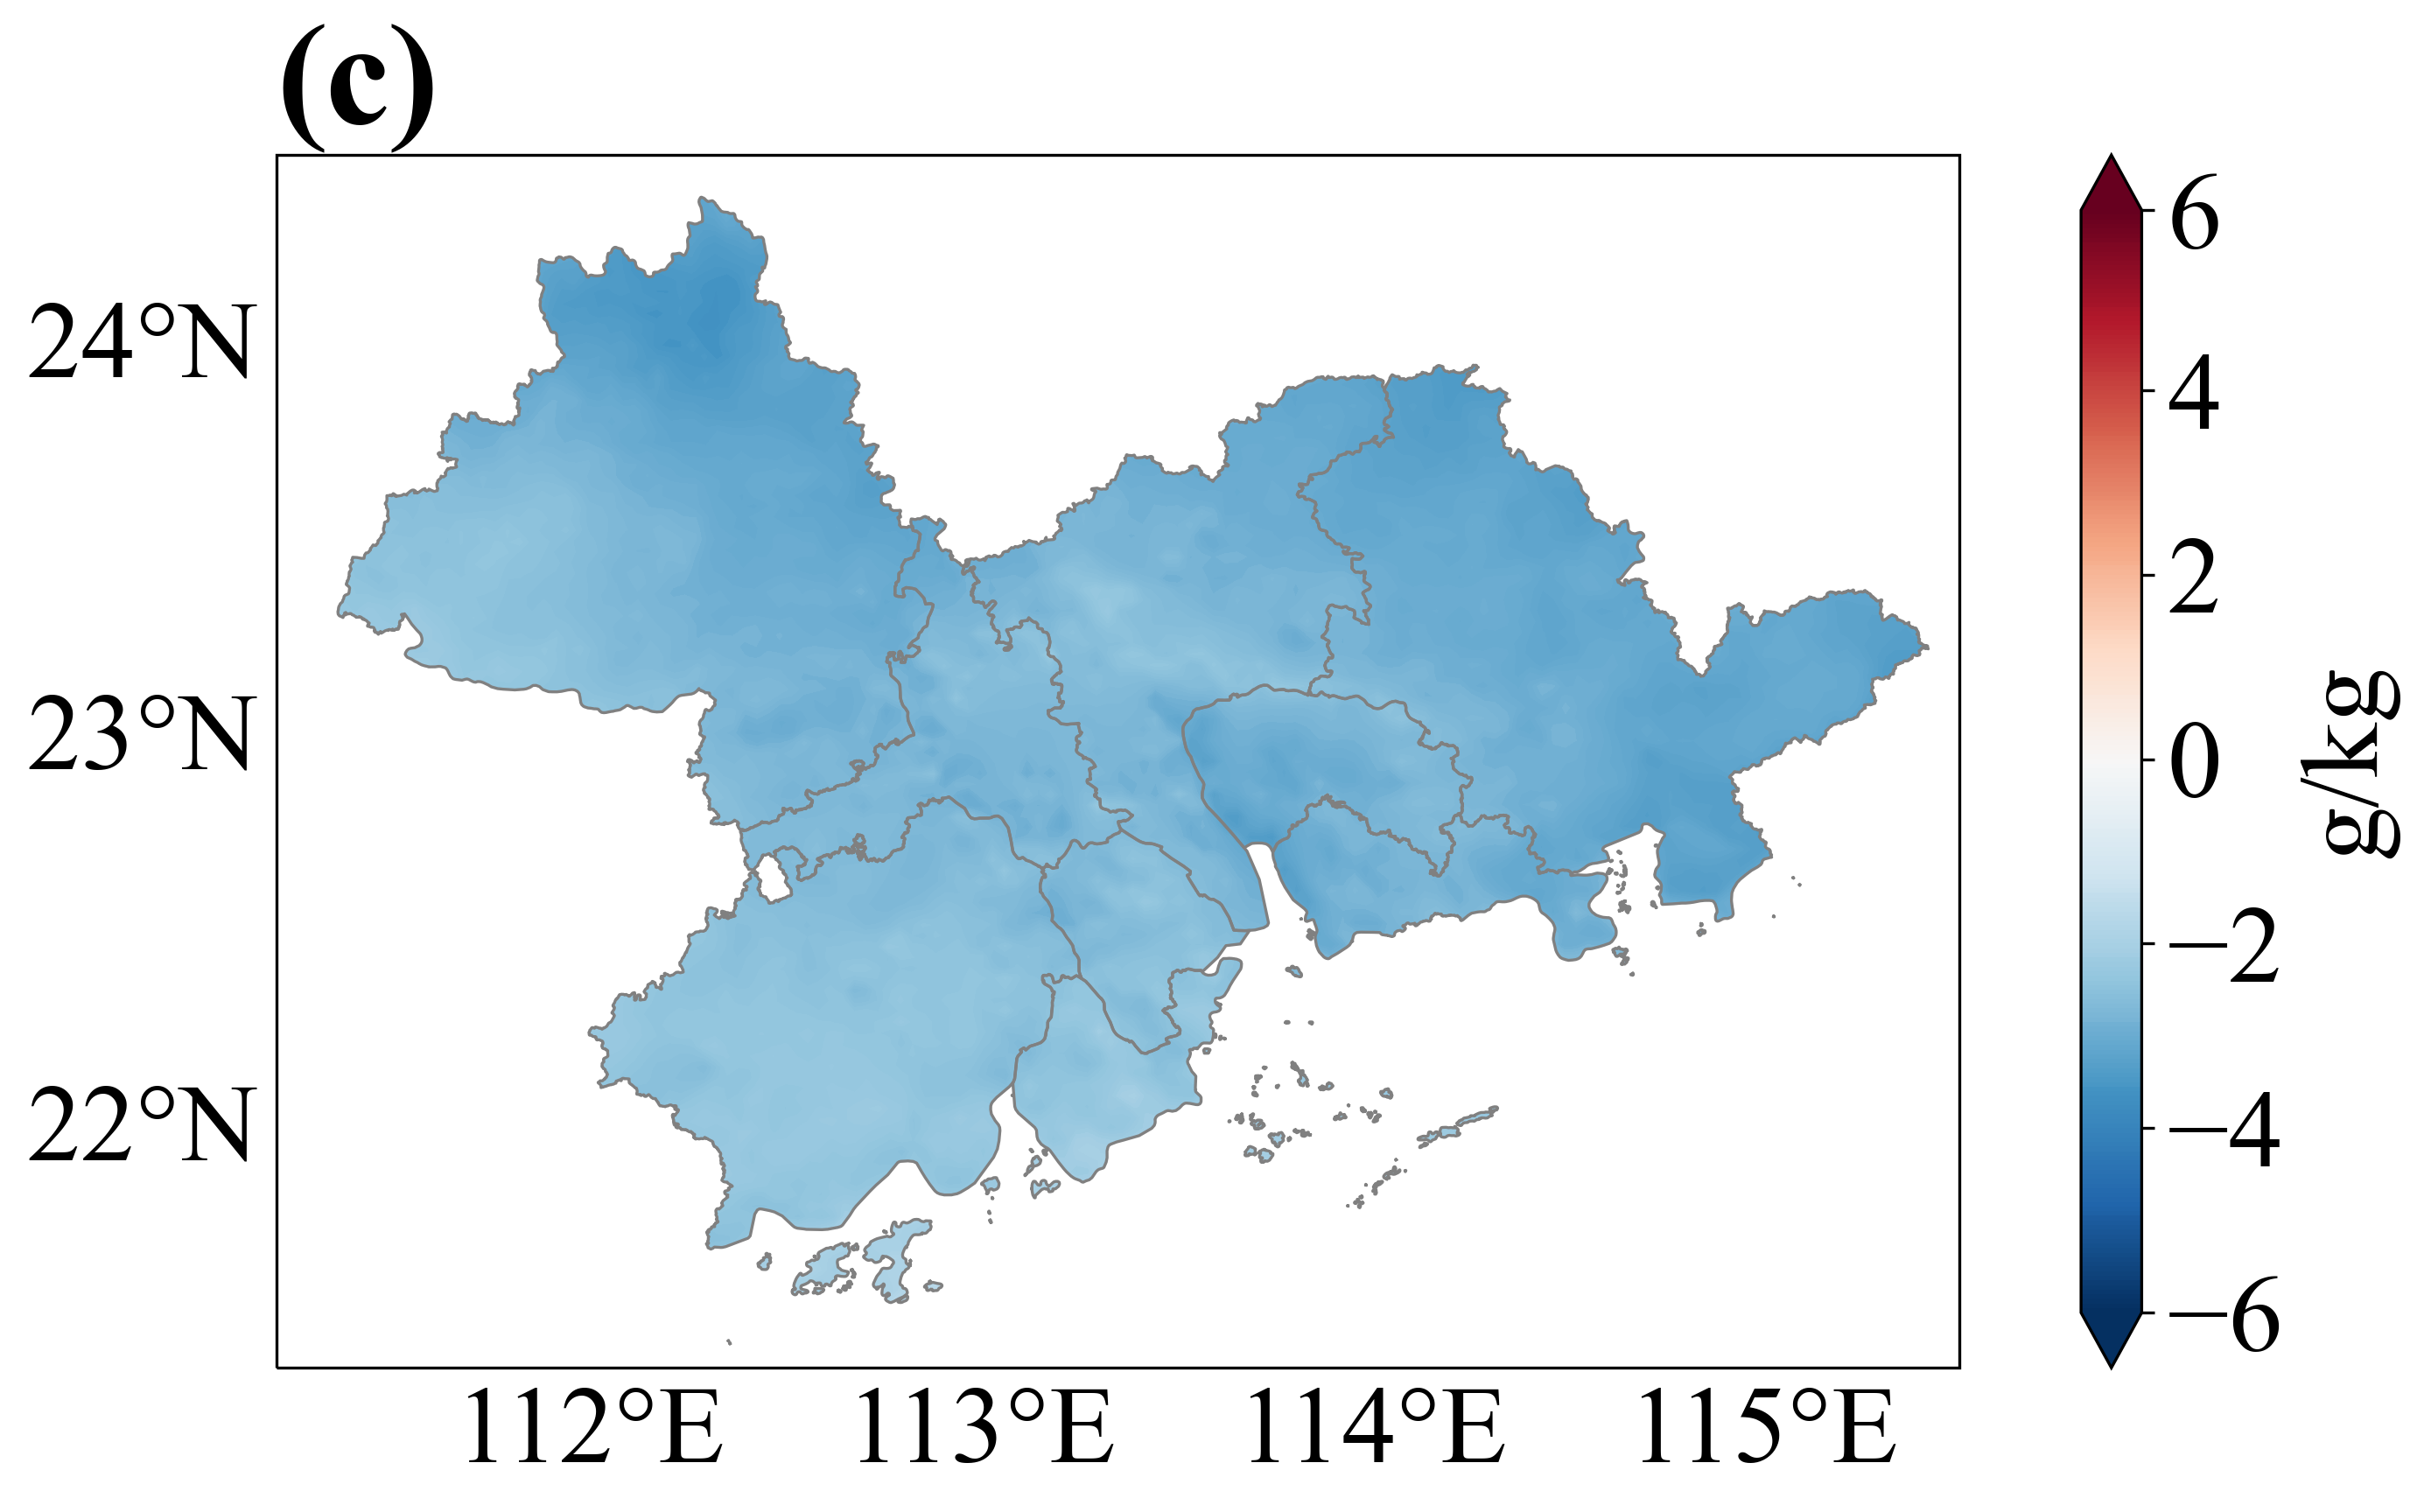

In [7]:
cmin = -6
cmax = 6
cmstep = 0.05
cbstep = 2

diff_noneobs(avg_summer, cmin, cmax, cmstep, cbstep,
              mean_summer, mean_autumn,
              title='(c)', colorbar_label='g/kg')